In [83]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# library for plotting
#import altair as alt

In [84]:
# Import Data
data = pd.read_csv("training.csv")
# Look at format
data.head()

,article_number,article_words,topic
0,1,"open,absent,cent,cent,cent,stock,inflow,rate,k...",FOREX MARKETS
1,2,"morn,stead,end,end,day,day,day,patch,patch,pat...",MONEY MARKETS
2,3,"socc,socc,world,world,recent,law,fifa,fifa,fif...",SPORTS
3,4,"open,forint,forint,forint,forint,cent,cent,ste...",FOREX MARKETS
4,5,"morn,complet,weekend,minut,minut,minut,arrow,d...",IRRELEVANT


In [85]:
# Code Topics into Numbers
topic_codes = {
    'ARTS CULTURE ENTERTAINMENT': 0,
    'BIOGRAPHIES PERSONALITIES PEOPLE': 1,
    'DEFENCE': 2,
    'DOMESTIC MARKETS': 3,
    'FOREX MARKETS': 4,
    'HEALTH': 5,
    'MONEY MARKETS': 6,
    'SCIENCE AND TECHNOLOGY': 7,
    'SHARE LISTINGS': 8,
    'SPORTS': 9,
    'IRRELEVANT': 10
}

# Topic mapping
data['topic_code'] = data['topic']
data = data.replace({'topic_code':topic_codes})

# Look at new column of Topic Codes
data.head()

,article_number,article_words,topic,topic_code
0,1,"open,absent,cent,cent,cent,stock,inflow,rate,k...",FOREX MARKETS,4
1,2,"morn,stead,end,end,day,day,day,patch,patch,pat...",MONEY MARKETS,6
2,3,"socc,socc,world,world,recent,law,fifa,fifa,fif...",SPORTS,9
3,4,"open,forint,forint,forint,forint,cent,cent,ste...",FOREX MARKETS,4
4,5,"morn,complet,weekend,minut,minut,minut,arrow,d...",IRRELEVANT,10


# Look at distribution of Topics in Training Set

## 1. All Data

In [86]:
# Count
print(data["topic"].value_counts(normalize=True,dropna=False, sort=False))

# Relative frequency
print(data["topic"].value_counts(normalize=True,dropna=False,sort=False))

SHARE LISTINGS                      0.022947
ARTS CULTURE ENTERTAINMENT          0.012316
BIOGRAPHIES PERSONALITIES PEOPLE    0.017579
FOREX MARKETS                       0.088947
MONEY MARKETS                       0.176105
IRRELEVANT                          0.498316
DOMESTIC MARKETS                    0.014000
SCIENCE AND TECHNOLOGY              0.007368
SPORTS                              0.116000
DEFENCE                             0.027158
HEALTH                              0.019263
Name: topic, dtype: float64
SHARE LISTINGS                      0.022947
ARTS CULTURE ENTERTAINMENT          0.012316
BIOGRAPHIES PERSONALITIES PEOPLE    0.017579
FOREX MARKETS                       0.088947
MONEY MARKETS                       0.176105
IRRELEVANT                          0.498316
DOMESTIC MARKETS                    0.014000
SCIENCE AND TECHNOLOGY              0.007368
SPORTS                              0.116000
DEFENCE                             0.027158
HEALTH                     

Text(0,0.5,'Count')

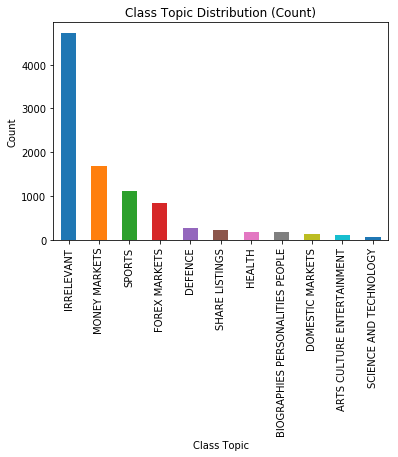

In [87]:
# Histogram of Topic Count Distribution
ax = data["topic"].value_counts(normalize=False,dropna=False, sort=True).plot(kind='bar', title="Class Topic Distribution (Count)")
ax.set_xlabel("Class Topic")
ax.set_ylabel("Count")

Text(0,0.5,'Relative Frequency')

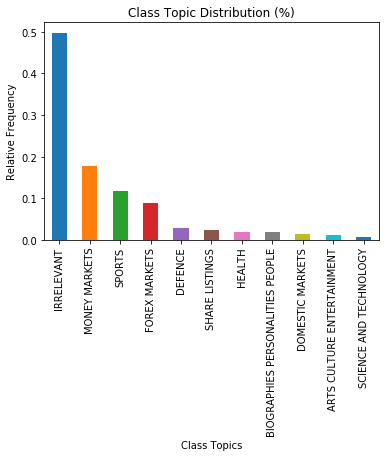

In [88]:
# Histogram of Relative Frequence per Topic
ax = data["topic"].value_counts(normalize=True,dropna=False,sort=True).plot(kind='bar', title="Class Topic Distribution (%)")
ax.set_xlabel("Class Topics")
ax.set_ylabel("Relative Frequency")

## 2. ONLY Relevant Articles

In [89]:
# Make a copy of Data
rel_data = data.copy()

# See that format is correct
rel_data.head()

,article_number,article_words,topic,topic_code
0,1,"open,absent,cent,cent,cent,stock,inflow,rate,k...",FOREX MARKETS,4
1,2,"morn,stead,end,end,day,day,day,patch,patch,pat...",MONEY MARKETS,6
2,3,"socc,socc,world,world,recent,law,fifa,fifa,fif...",SPORTS,9
3,4,"open,forint,forint,forint,forint,cent,cent,ste...",FOREX MARKETS,4
4,5,"morn,complet,weekend,minut,minut,minut,arrow,d...",IRRELEVANT,10


In [90]:
# Only take Relevant Topics (exclude IRRELEVANT)
rel_topics = rel_data['topic_code'] != 10

# Check format doesn't contain IRRELEVANT
rel_data = rel_data[rel_topics]
rel_data.head()

,article_number,article_words,topic,topic_code
0,1,"open,absent,cent,cent,cent,stock,inflow,rate,k...",FOREX MARKETS,4
1,2,"morn,stead,end,end,day,day,day,patch,patch,pat...",MONEY MARKETS,6
2,3,"socc,socc,world,world,recent,law,fifa,fifa,fif...",SPORTS,9
3,4,"open,forint,forint,forint,forint,cent,cent,ste...",FOREX MARKETS,4
5,6,"regist,equal,stock,stock,city,city,period,issu...",SHARE LISTINGS,8


Text(0,0.5,'Count')

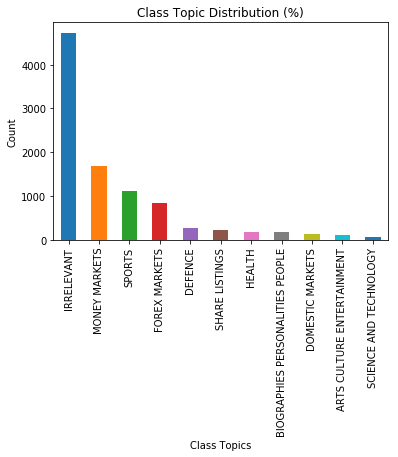

In [91]:
# Histogram of Count per Topic without IRRELEVANT articles
ax = data["topic"].value_counts(normalize=False,dropna=False,sort=True).plot(kind='bar', title="Class Topic Distribution (%)")
ax.set_xlabel("Class Topics")
ax.set_ylabel("Count")

Text(0,0.5,'Relative Frequency')

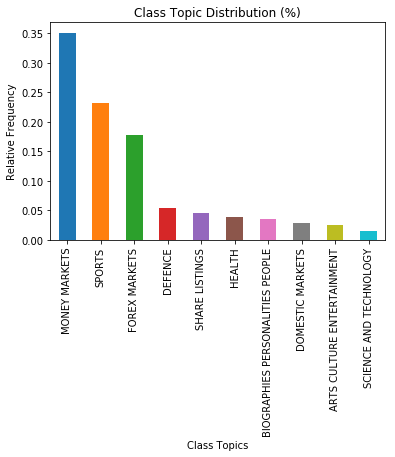

In [92]:
# Histogram of Topic Distribution without IRRELEVANT articles
# Relative Frequence per Topic
ax = rel_data["topic"].value_counts(normalize=True,dropna=False,sort=True).plot(kind='bar', title="Class Topic Distribution (%)")
ax.set_xlabel("Class Topics")
ax.set_ylabel("Relative Frequency")

# Article Length by Category

In [96]:
data['Article_length'] = data['article_words'].str.len()

Text(0.5,1,'Article length distribution of all articles')

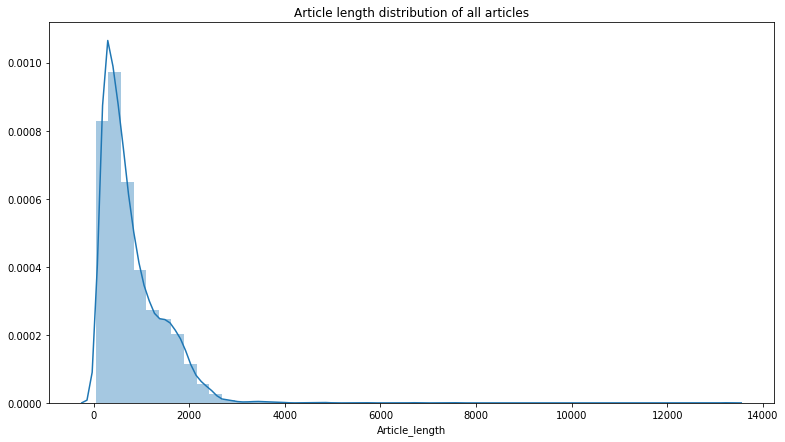

In [120]:
plt.figure(figsize=(13,7))
sns.distplot(data['Article_length']).set_title('Article length distribution of all articles')

In [121]:
quantile_95 = data['Article_length'].quantile(0.95)
data_95 = data[data['Article_length'] < quantile_95]

Text(0.5,1,'Article length distribution of all articles (upto 95th quantile)')

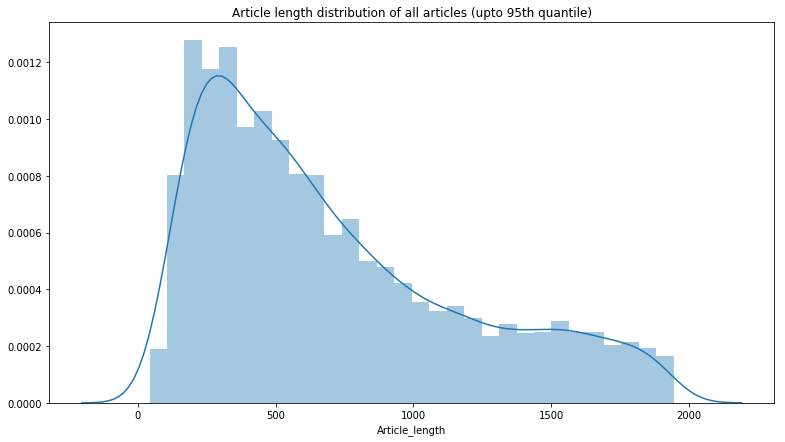

In [122]:
plt.figure(figsize=(13,7))
sns.distplot(data_95['Article_length']).set_title('Article length distribution of all articles (upto 95th quantile)')

In [123]:
rel_data['Article_length'] = rel_data['article_words'].str.len()

Text(0.5,1,'Article length distribution of RELEVANT articles')

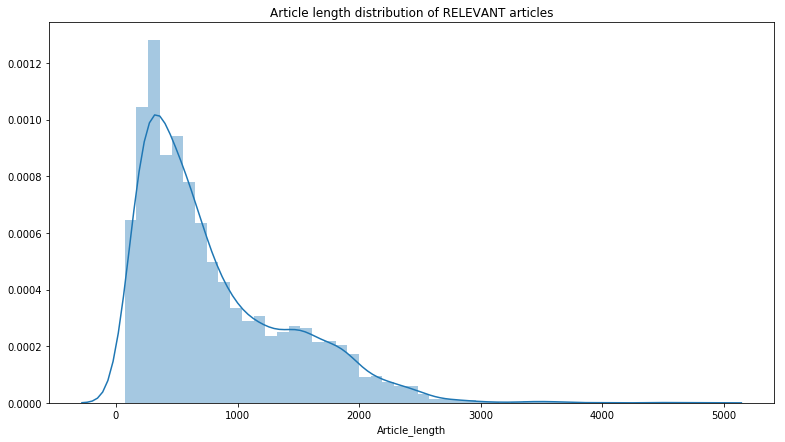

In [124]:
plt.figure(figsize=(13,7))
sns.distplot(rel_data['Article_length']).set_title('Article length distribution of RELEVANT articles')

In [125]:
rel_quantile_95 = rel_data['Article_length'].quantile(0.95)
rel_data_95 = rel_data[rel_data['Article_length'] < rel_quantile_95]

Text(0.5,1,'Article length distribution of RELEVANT articles')

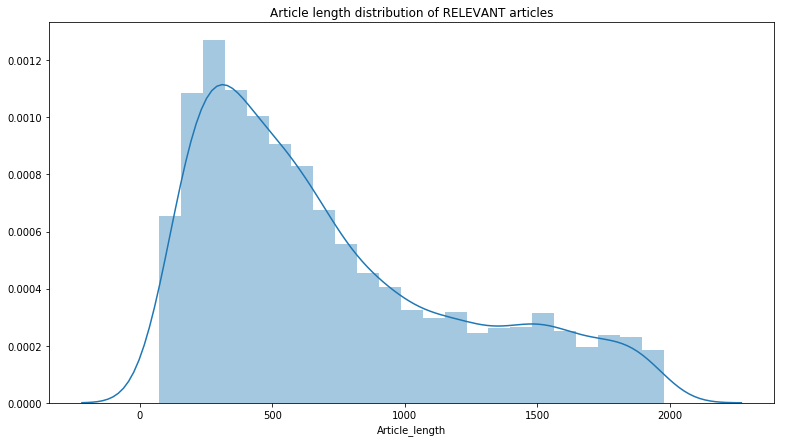

In [126]:
plt.figure(figsize=(13,7))
sns.distplot(rel_data_95['Article_length']).set_title('Article length distribution of RELEVANT articles')

Article Length is less skewed when we exclude IRRELEVANT articles

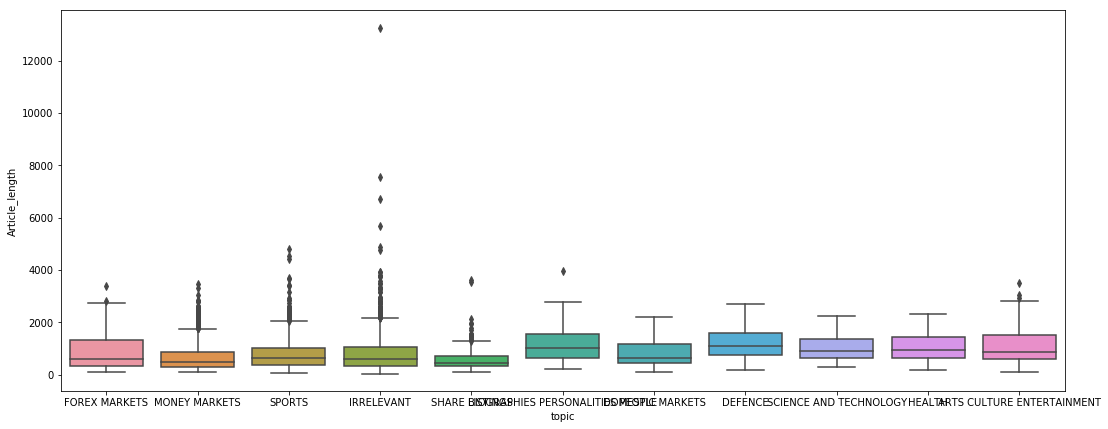

In [127]:
plt.figure(figsize=(18,7))
sns.boxplot(data=data, x='topic', y='Article_length')

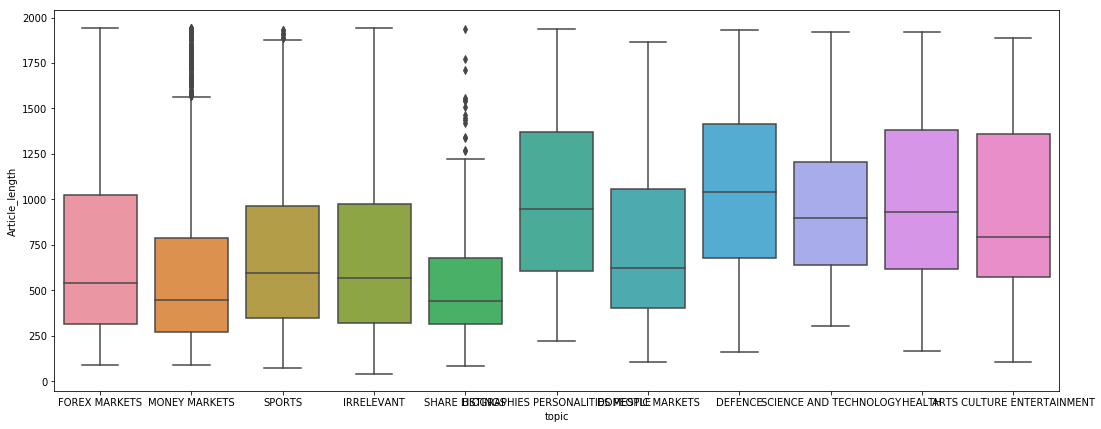

In [128]:
plt.figure(figsize=(18,7))
sns.boxplot(data=data_95, x='topic', y='Article_length')

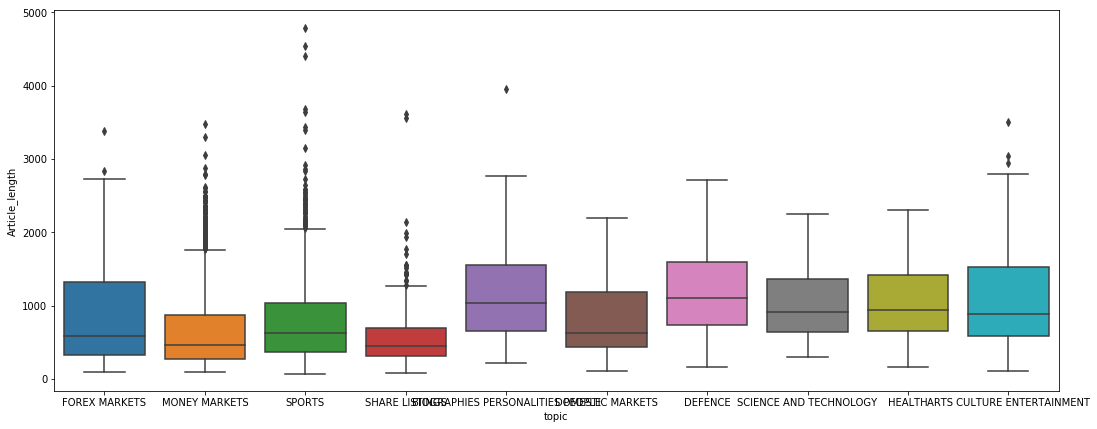

In [129]:
plt.figure(figsize=(18,7))
sns.boxplot(data=rel_data, x='topic', y='Article_length')

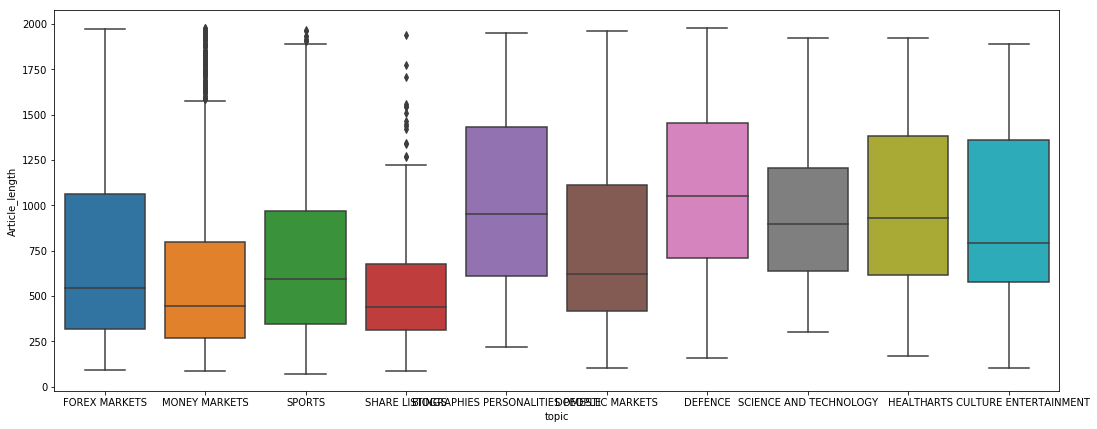

In [130]:
plt.figure(figsize=(18,7))
sns.boxplot(data=rel_data_95, x='topic', y='Article_length')

Distribution of Article Length looks pretty similar between all class topics.